In [6]:
# my libiaries 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import pandas as pd
import time
import re
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [7]:
#Have a favorable view of the U.S.
df=pd.read_csv('TRUMPWORLD-us.csv')
df

year        avg  Canada  France  Germany  Greece  Hungary  Italy  \
0   2000  67.500000     NaN      62       78     NaN      NaN   76.0   
1   2002  61.500000    72.0      62       60     NaN      NaN   70.0   
2   2003  44.692308    63.0      42       45     NaN      NaN   60.0   
3   2004  35.666667     NaN      37       38     NaN      NaN    NaN   
4   2005  43.583333    59.0      43       42     NaN      NaN    NaN   
5   2006  35.333333     NaN      39       37     NaN      NaN    NaN   
6   2007  48.391304    55.0      39       30     NaN      NaN   53.0   
7   2008  44.235294     NaN      42       31     NaN      NaN    NaN   
8   2009  59.235294    68.0      75       64     NaN      NaN    NaN   
9   2010  60.117647     NaN      73       63     NaN      NaN    NaN   
10  2011  57.866667     NaN      75       62     NaN      NaN    NaN   
11  2012  51.866667     NaN      69       52    35.0      NaN   74.0   
12  2013  61.433333    64.0      64       53    39.0      NaN   76.0   
13  2014  61.187500     NaN      75       51    34.0      NaN   78.0   
14  2015  65.322581    68.0      73       50     NaN      NaN   83.0   
15  2016  62.470588    65.0      63       57    38.0     62.0   72.0   
16  2017  49.540541    43.0      46       35    43.0     63.0   61.0   

    Netherlands  Poland    ...      Senegal  South Africa  Tanzania  \
0           NaN    86.0    ...          NaN           NaN       NaN   
1           NaN    79.0    ...          NaN          65.0      53.0   
2           NaN     NaN    ...          NaN           NaN       NaN   
3           NaN     NaN    ...          NaN           NaN       NaN   
4          45.0    62.0    ...          NaN           NaN       NaN   
5           NaN     NaN    ...          NaN           NaN       NaN   
6           NaN    61.0    ...          NaN           NaN      46.0   
7           NaN    68.0    ...          NaN          60.0      65.0   
8           NaN    67.0    ...          NaN           NaN       NaN   
9           NaN    74.0    ...          NaN           NaN       NaN   
10          NaN    70.0    ...          NaN           NaN       NaN   
11          NaN    69.0    ...          NaN           NaN       NaN   
12          NaN    67.0    ...         81.0          72.0       NaN   
13          NaN    73.0    ...         74.0          68.0      75.0   
14          NaN    74.0    ...         80.0          74.0      78.0   
15         65.0    74.0    ...          NaN          60.0       NaN   
16         37.0    73.0    ...         55.0          53.0      57.0   

    Argentina  Brazil  Chile  Colombia  Mexico  Peru  Venezuela  
0        50.0     NaN    NaN       NaN    68.0  74.0        NaN  
1        34.0     NaN    NaN       NaN    64.0  67.0        NaN  
2         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
3         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
4         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
5         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
6        16.0     NaN   55.0       NaN    56.0  61.0        NaN  
7        22.0     NaN    NaN       NaN    47.0   NaN        NaN  
8        38.0     NaN    NaN       NaN    69.0   NaN        NaN  
9        42.0    62.0    NaN       NaN    56.0   NaN        NaN  
10        NaN    62.0    NaN       NaN    52.0   NaN        NaN  
11        NaN    61.0    NaN       NaN    56.0   NaN        NaN  
12       41.0    73.0   68.0       NaN    66.0   NaN       53.0  
13       36.0    65.0   72.0      64.0    63.0  65.0       62.0  
14       43.0    73.0   68.0       NaN    66.0  70.0       51.0  
15        NaN     NaN    NaN       NaN     NaN   NaN        NaN  
16       35.0    50.0   39.0      51.0    30.0  51.0       47.0  

[17 rows x 39 columns]

### Use `avg`, `France`,`Germany`,`UK`,`Russia`,`Turkey`

In [38]:
# # My style:

# plt.rcdefaults()
# plt.rcParams.update({
#           "figure.facecolor": "#f1f1f3",
#               "pdf.fonttype": 42,
#               "ps.fonttype": 42,
#               "axes.facecolor": "#f1f1f3",
#               "axes.grid" : True,
#               "axes.grid.axis" : 'y',
    
#               "grid.color"    : "#ffffff",
#               "grid.linewidth": 1.5,
#               "axes.spines.left" : False,
#               "axes.spines.right" : False,
#               "axes.axisbelow": True,
#               "axes.linewidth": 1.5,
#               "axes.spines.top" : False,
#               "ytick.major.size": 0,     
#               "ytick.minor.size": 0,
#               "xtick.direction" : "in",
#               "xtick.major.size" : 0,
#               "xtick.color"      : "#000000",
#               "ytick.color"      : "#000000",
#               "axes.edgecolor"    :"#ffffff",
#               "axes.labelcolor"    :"#000000",
#               'axes.titlesize': 'x-large',
#               'axes.labelsize': 'large',
#               "axes.prop_cycle" : plt.cycler('color',
#                                     ['#405281', '#d3a9a9','#a8b7c0', '#cadfea', '#344163',
#                                       '#80a4ed', '#6b8daf', '#bcd3f2',
#                                      '#80a4ed', '#395c6b']),
# #                "text.color":"#ffffff",
#                 'patch.linewidth': 0.5,
#               'patch.facecolor': '#348ABD',
#               'patch.edgecolor': '#ffffff',
#               'patch.antialiased': True,
#               'font.size': 10.0,
#               'axes.edgecolor': 'white',
#     'xtick.color': '#555555',
#   'xtick.direction': 'out',
#   'ytick.color': '#555555',
#   'ytick.direction': 'out',
#   'grid.color': 'white',
#   'grid.linestyle': '-',
  
               
              
# })


In [50]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'axes.facecolor': '#f1f1f3',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  "axes.prop_cycle" : plt.cycler('color',
                                    ['#405281', '#d3a9a9','#a8b7c0', '#cadfea', '#344163',
                                      '#80a4ed', '#6b8daf', '#bcd3f2',
                                     '#80a4ed', '#395c6b']),
  'xtick.color': '#555555',
  'xtick.direction': 'out',
  'ytick.color': '#555555',
  'ytick.direction': 'out',
  'grid.color': 'white',
  'grid.linestyle': '-',
  'figure.facecolor': 'white',
  'pdf.fonttype': 42,
  'ps.fonttype': 42,
})

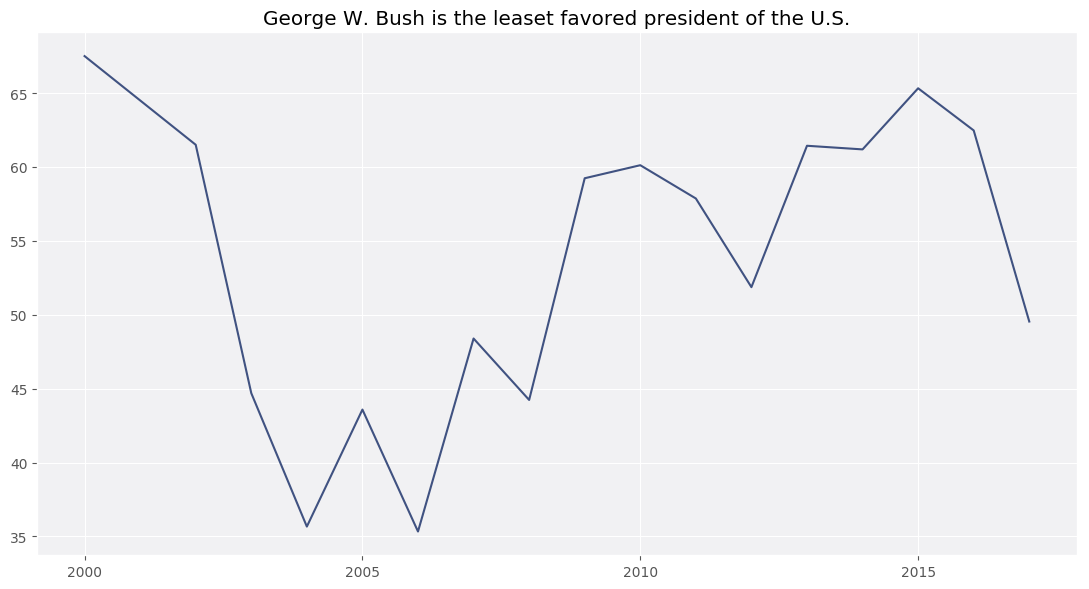

In [55]:
ax=df.plot(x='year',y='avg',kind='line', figsize=(11, 6), legend=False)

ax.set_title("George W. Bush is the leaset favored president of the U.S.")
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.set_xticks([2000,2005,2010,2015])
# ax.set_yxicks([35,40,45,50,55,60,65])
plt.tight_layout()
plt.savefig("bush_least_favored.pdf",facecolor='#f1f1f3')
plt.show()

In [56]:
df_new=df[['year','avg','France','Germany','UK','Russia','Turkey']].copy()
df_new

year        avg  France  Germany  UK  Russia  Turkey
0   2000  67.500000      62       78  83    37.0    52.0
1   2002  61.500000      62       60  75    61.0    30.0
2   2003  44.692308      42       45  70    37.0    15.0
3   2004  35.666667      37       38  58    46.0    30.0
4   2005  43.583333      43       42  55    52.0    23.0
5   2006  35.333333      39       37  56    43.0    12.0
6   2007  48.391304      39       30  51    41.0     9.0
7   2008  44.235294      42       31  53    46.0    12.0
8   2009  59.235294      75       64  69    44.0    14.0
9   2010  60.117647      73       63  65    57.0    17.0
10  2011  57.866667      75       62  61    56.0    10.0
11  2012  51.866667      69       52  60    52.0    15.0
12  2013  61.433333      64       53  58    51.0    21.0
13  2014  61.187500      75       51  66    23.0    19.0
14  2015  65.322581      73       50  65    15.0    29.0
15  2016  62.470588      63       57  61     NaN     NaN
16  2017  49.540541      46       35  50    41.0    18.0

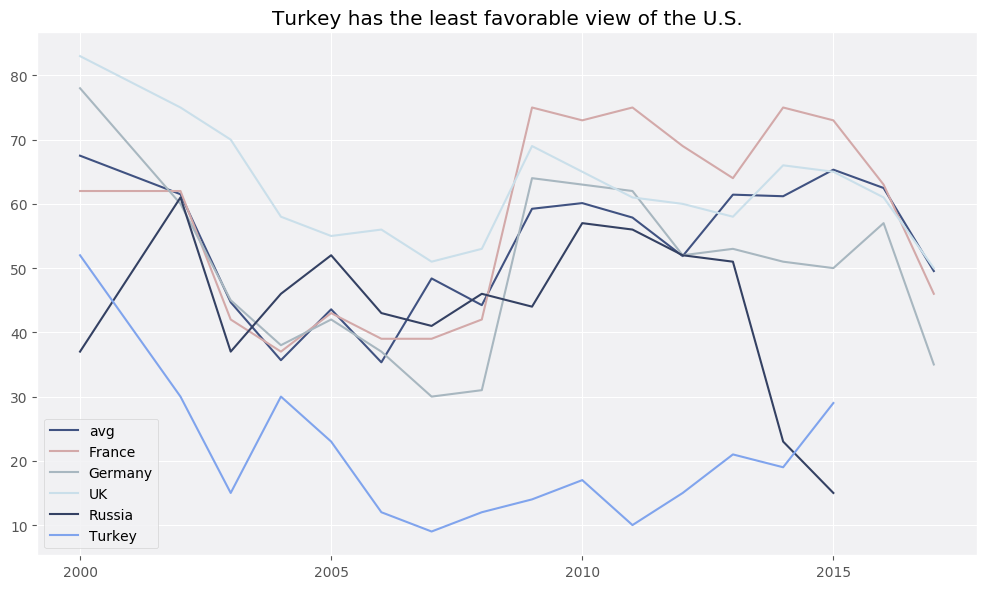

In [58]:
ax=df_new.plot(x='year',kind='line', figsize=(10, 6))
ax.set_title("Turkey has the least favorable view of the U.S.")
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.set_xticks([2000,2005,2010,2015])
# ax.set_yxicks([35,40,45,50,55,60,65])
plt.tight_layout()
plt.savefig("turkey_least.pdf",facecolor='#f1f1f3')
plt.show()
plt.show()

### Only interested in Trump (2015-2017)

In [59]:
df_trump=df.loc[df['year'].isin(['2015','2016','2017'])]
df_trump.dropna(axis='columns',inplace=True)
df_trump

/Users/dianzhang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


year        avg  Canada  France  Germany  Italy  Poland  Spain  UK  \
14  2015  65.322581    68.0      73       50   83.0    74.0   65.0  65   
15  2016  62.470588    65.0      63       57   72.0    74.0   59.0  61   
16  2017  49.540541    43.0      46       35   61.0    73.0   31.0  50   

    Australia  India  Japan  Kenya  Nigeria  South Africa  
14       63.0   70.0   68.0   84.0     76.0          74.0  
15       60.0   56.0   72.0   63.0     66.0          60.0  
16       48.0   49.0   57.0   54.0     69.0          53.0

In [61]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'axes.facecolor': '#f1f1f3',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  "axes.prop_cycle" : plt.cycler('color',
                                    ['#a8b7c0']),
  'xtick.color': '#555555',
  'xtick.direction': 'out',
  'ytick.color': '#555555',
  'ytick.direction': 'out',
  'grid.color': 'white',
  'grid.linestyle': '-',
  'figure.facecolor': 'white',
  'pdf.fonttype': 42,
  'ps.fonttype': 42,
})

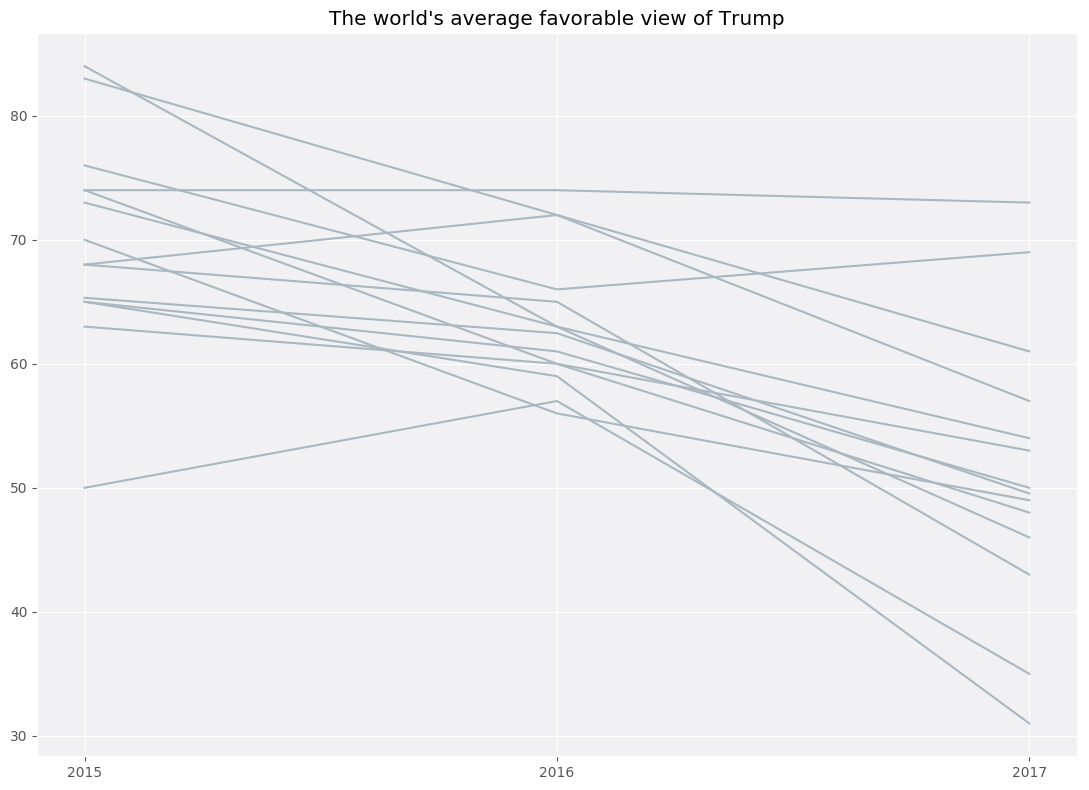

In [67]:
ax=df_trump.plot(x='year',kind='line', figsize=(11, 8),legend=False)
ax.set_title("The world's average favorable view of Trump")
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.set_xticks([2015,2016,2017])
# ax.set_yxicks([35,40,45,50,55,60,65])
plt.tight_layout()
plt.savefig("turkey_least.pdf",facecolor='#f1f1f3')
plt.show()

### Trust the U.S. president when it comes to world affairs 
(TRUMPWORLD-pres.csv)

In [4]:
# #Have a favorable view of the U.S.
# df_affairs=pd.read_csv('TRUMPWORLD-us.csv')
# df_affairs

year        avg  Canada  France  Germany  Greece  Hungary  Italy  \
0   2000  67.500000     NaN      62       78     NaN      NaN   76.0   
1   2002  61.500000    72.0      62       60     NaN      NaN   70.0   
2   2003  44.692308    63.0      42       45     NaN      NaN   60.0   
3   2004  35.666667     NaN      37       38     NaN      NaN    NaN   
4   2005  43.583333    59.0      43       42     NaN      NaN    NaN   
5   2006  35.333333     NaN      39       37     NaN      NaN    NaN   
6   2007  48.391304    55.0      39       30     NaN      NaN   53.0   
7   2008  44.235294     NaN      42       31     NaN      NaN    NaN   
8   2009  59.235294    68.0      75       64     NaN      NaN    NaN   
9   2010  60.117647     NaN      73       63     NaN      NaN    NaN   
10  2011  57.866667     NaN      75       62     NaN      NaN    NaN   
11  2012  51.866667     NaN      69       52    35.0      NaN   74.0   
12  2013  61.433333    64.0      64       53    39.0      NaN   76.0   
13  2014  61.187500     NaN      75       51    34.0      NaN   78.0   
14  2015  65.322581    68.0      73       50     NaN      NaN   83.0   
15  2016  62.470588    65.0      63       57    38.0     62.0   72.0   
16  2017  49.540541    43.0      46       35    43.0     63.0   61.0   

    Netherlands  Poland    ...      Senegal  South Africa  Tanzania  \
0           NaN    86.0    ...          NaN           NaN       NaN   
1           NaN    79.0    ...          NaN          65.0      53.0   
2           NaN     NaN    ...          NaN           NaN       NaN   
3           NaN     NaN    ...          NaN           NaN       NaN   
4          45.0    62.0    ...          NaN           NaN       NaN   
5           NaN     NaN    ...          NaN           NaN       NaN   
6           NaN    61.0    ...          NaN           NaN      46.0   
7           NaN    68.0    ...          NaN          60.0      65.0   
8           NaN    67.0    ...          NaN           NaN       NaN   
9           NaN    74.0    ...          NaN           NaN       NaN   
10          NaN    70.0    ...          NaN           NaN       NaN   
11          NaN    69.0    ...          NaN           NaN       NaN   
12          NaN    67.0    ...         81.0          72.0       NaN   
13          NaN    73.0    ...         74.0          68.0      75.0   
14          NaN    74.0    ...         80.0          74.0      78.0   
15         65.0    74.0    ...          NaN          60.0       NaN   
16         37.0    73.0    ...         55.0          53.0      57.0   

    Argentina  Brazil  Chile  Colombia  Mexico  Peru  Venezuela  
0        50.0     NaN    NaN       NaN    68.0  74.0        NaN  
1        34.0     NaN    NaN       NaN    64.0  67.0        NaN  
2         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
3         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
4         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
5         NaN     NaN    NaN       NaN     NaN   NaN        NaN  
6        16.0     NaN   55.0       NaN    56.0  61.0        NaN  
7        22.0     NaN    NaN       NaN    47.0   NaN        NaN  
8        38.0     NaN    NaN       NaN    69.0   NaN        NaN  
9        42.0    62.0    NaN       NaN    56.0   NaN        NaN  
10        NaN    62.0    NaN       NaN    52.0   NaN        NaN  
11        NaN    61.0    NaN       NaN    56.0   NaN        NaN  
12       41.0    73.0   68.0       NaN    66.0   NaN       53.0  
13       36.0    65.0   72.0      64.0    63.0  65.0       62.0  
14       43.0    73.0   68.0       NaN    66.0  70.0       51.0  
15        NaN     NaN    NaN       NaN     NaN   NaN        NaN  
16       35.0    50.0   39.0      51.0    30.0  51.0       47.0  

[17 rows x 39 columns]

Text(0.5,1,"The world's average favorable view of the U.S.")

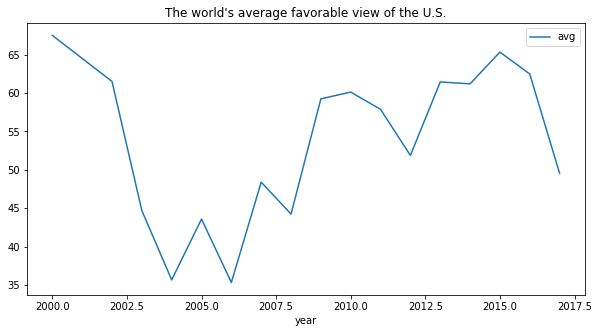

In [6]:
# ax=df_affairs.plot(x='year',y='avg',kind='line', figsize=(10, 5))
# ax.set_title("The world's average favorable view of the U.S.")


Withdraw support for international climate change agreements (TRUMPWORLD-issue-1.csv)
Build a wall on the border between the U. S. and Mexico (TRUMPWORLD-issue-2.csv)
Withdraw U.S. support from the Iran nuclear weapons agreement (TRUMPWORLD-issue-3.csv)
Withdraw U.S. support for major trade agreements (TRUMPWORLD-issue-4.csv)
Introduce tighter restrictions on those entering the U.S. from some majority-Muslim countries (TRUMPWORLD-issue-5.csv)


In [91]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#348ABD',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'axes.facecolor': '#f1f1f3',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  "axes.prop_cycle" : plt.cycler('color',
                                    ['#405281', '#d3a9a9','#a8b7c0', '#cadfea', '#344163',
                                      '#80a4ed', '#6b8daf', '#bcd3f2',
                                     '#80a4ed', '#395c6b']),
  'xtick.color': '#555555',
  'xtick.direction': 'out',
  'ytick.color': '#555555',
  'ytick.direction': 'out',
  'grid.color': 'white',
  'grid.linestyle': '-',
  'figure.facecolor': 'white',
  'pdf.fonttype': 42,
  'ps.fonttype': 42,
})

### Withdraw support for international climate change agreements (TRUMPWORLD-issue-1.csv)

In [76]:
df_climate=pd.read_csv('TRUMPWORLD-issue-1.csv')
df_climate.head(5)

country  net_approval  Approve  Disapprove  DK/Refused
0   Canada           -64       15          79           5
1   France           -81        9          90           1
2  Germany           -88        5          93           2
3   Greece           -71       11          82           7
4  Hungary           -62       13          75          12

In [100]:
df_climate['Disapprove'] *= -1
df_climate.head()

country  net_approval  Approve  Disapprove  DK/Refused
0   Canada           -64       15         -79           5
1   France           -81        9         -90           1
2  Germany           -88        5         -93           2
3   Greece           -71       11         -82           7
4  Hungary           -62       13         -75          12

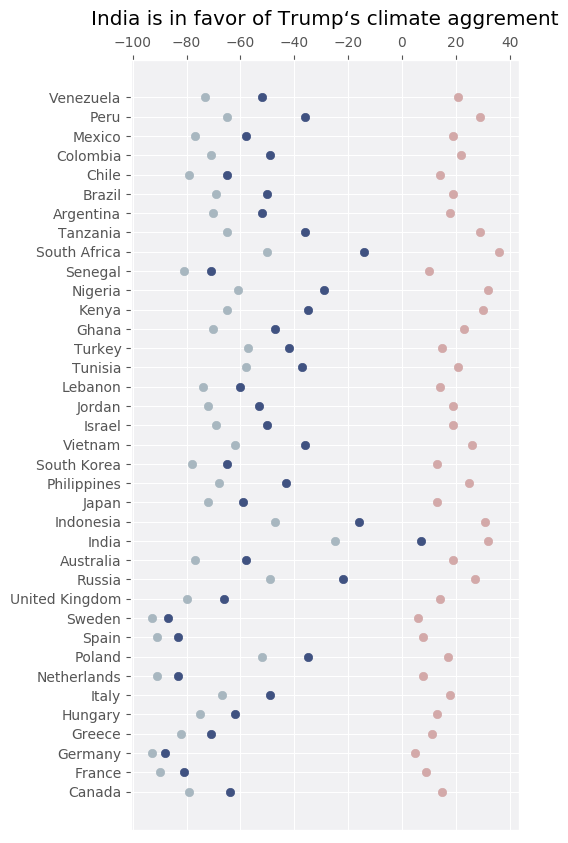

In [104]:
fig, ax = plt.subplots(figsize=(5,10))

ax.scatter(df_climate.net_approval, df_climate.country)
ax.scatter(df_climate.Approve, df_climate.country)
ax.scatter(df_climate.Disapprove, df_climate.country)
# ax.yaxis.label.set_visible(False)
# ax.xaxis.label.set_visible(False)
ax.xaxis.set_ticks_position('top')
ax.set_title('India is in favor of Trump‘s climate aggrement',pad=25,loc='center')
plt.savefig("climate.pdf",facecolor='#f1f1f3')
plt.show()

In [82]:
ax=df_climate.plot(x='net_approval',y='country')
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [83]:

# ax=df_climate.plot(x='net_approval',y='country',figsize=(10,6))

fig, ax = plt.subplots(figsize=(5,10))

ax.scatter(df.net_approval, df.country)
ax.scatter(df.Approve, df.country)
ax.scatter(df.Disapprove, df.country)
# ax.axes.grid(which='major', axis='y')
# ax.legend_.remove()
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)

ax.set_title('India is in favor of Trump‘s climate aggrement',pad=25,loc='center')
plt.savefig("climate.pdf",facecolor='#f1f1f3')

AttributeError: 'DataFrame' object has no attribute 'net_approval'